In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Imports successful")

✅ Imports successful


In [2]:
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california.frame  # This includes features + target together

print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Shape: (20640, 9)

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print("Data Info:")
print(df.info())

print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       

Price Statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


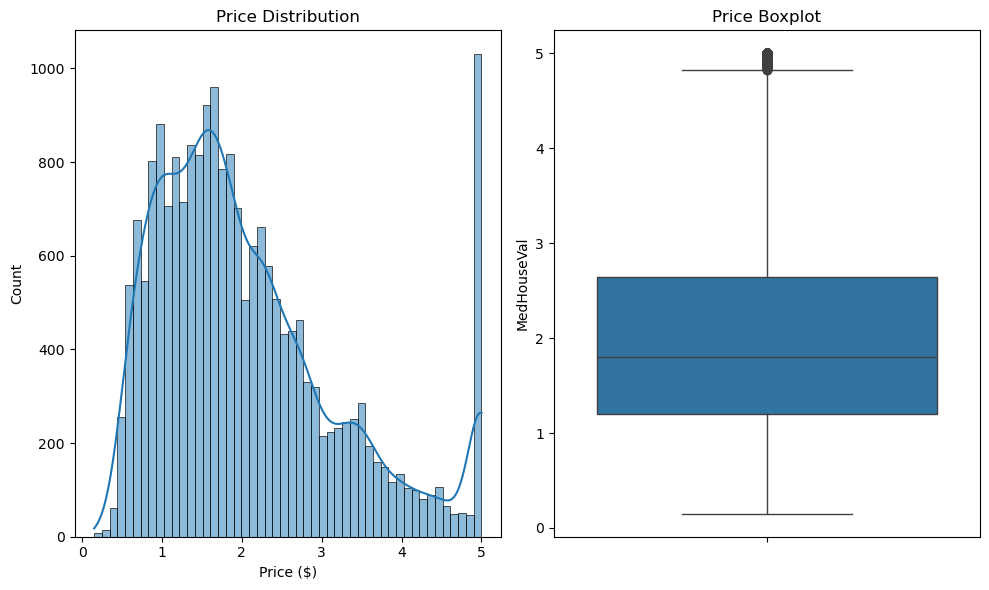

✅ Visualization saved


In [4]:
target_column = 'MedHouseVal'

print(f"Price Statistics:")
print(df[target_column].describe())

# Visualize distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[target_column], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target_column])
plt.title('Price Boxplot')

plt.tight_layout()
plt.savefig('../visuals/price_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")